In [169]:
!pip install catboost xgboost tabulate






[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [192]:
!pip install --upgrade pip

In [180]:
!pip install --upgrade scikit-learn imbalanced-learn




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate


In [182]:
train=pd.read_csv("Train_data.csv")
test=pd.read_csv("Test_data.csv")

In [183]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [184]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [186]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [187]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [189]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on training data only (never on test)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(f"Original training data shape: {x_train.shape}, {y_train.shape}")
print(f"Resampled training data shape: {x_train_resampled.shape}, {y_train_resampled.shape}")


ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py)

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [90]:
train_df.duplicated().sum()

np.int64(0)

In [91]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: >

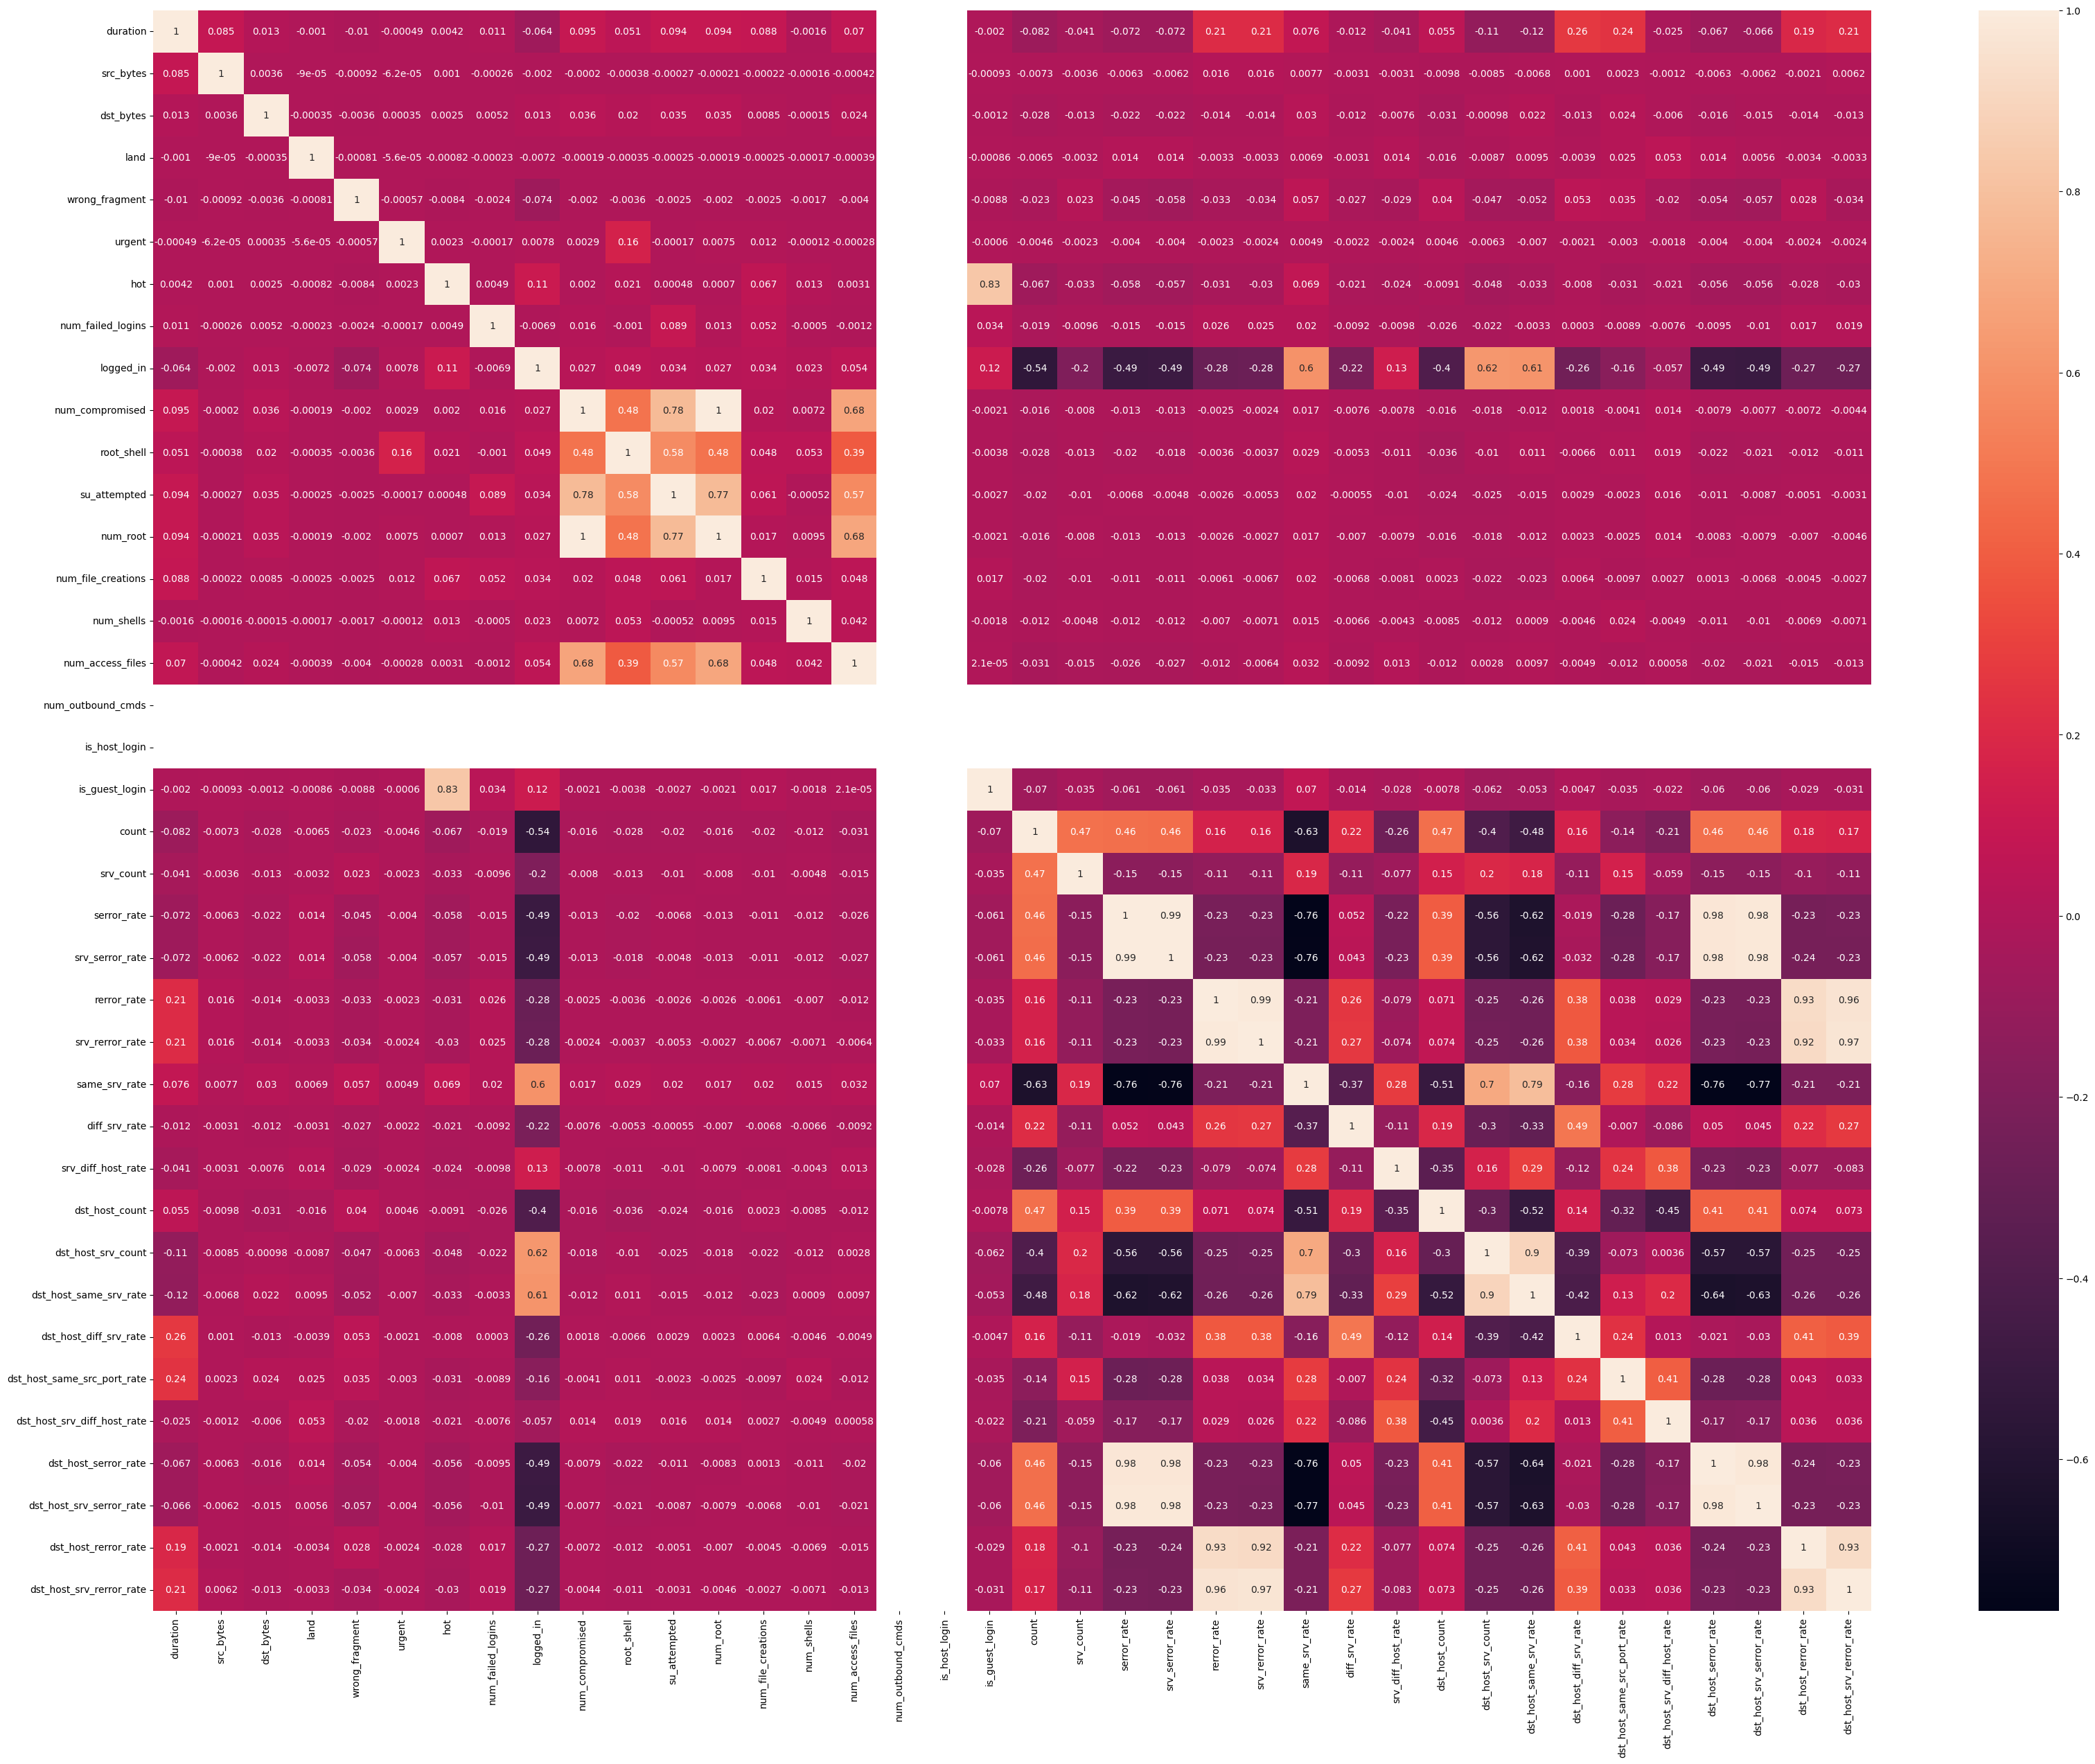

In [92]:
numeric_df = train.select_dtypes(include='number')

plt.figure(figsize=(40, 30))
sns.heatmap(numeric_df.corr(), annot=True)

<Axes: xlabel='class', ylabel='count'>

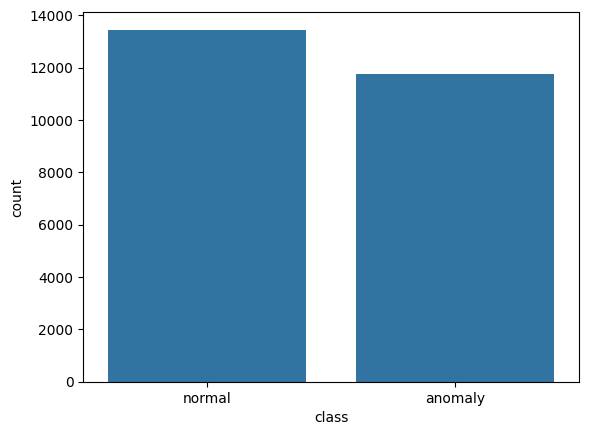

In [93]:
sns.countplot(x=train['class'])

In [94]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [95]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [96]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [97]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [98]:
X_train = X_train[selected_features]

In [99]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [101]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [102]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

[I 2025-08-03 13:41:28,237] A new study created in memory with name: no-name-43a4d1bf-cabc-4f60-b0e7-8a2884bf8615
[I 2025-08-03 13:41:28,984] Trial 0 finished with value: 0.9824027520508071 and parameters: {'KNN_n_neighbors': 6}. Best is trial 0 with value: 0.9824027520508071.


FrozenTrial(number=0, state=1, values=[0.9824027520508071], datetime_start=datetime.datetime(2025, 8, 3, 13, 41, 28, 239888), datetime_complete=datetime.datetime(2025, 8, 3, 13, 41, 28, 984487), params={'KNN_n_neighbors': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


Train Score: 0.9853
Test Score: 0.9824

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3498
           1       0.99      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



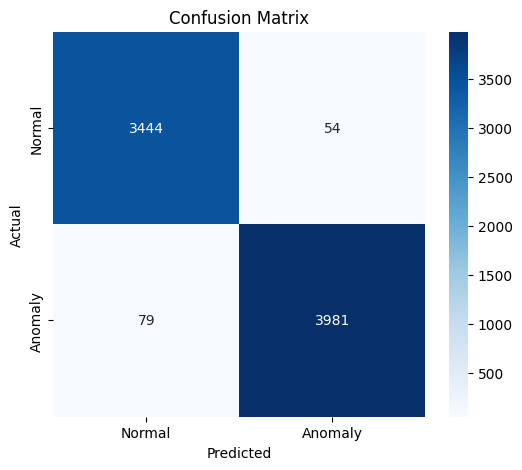

Accuracy:  0.9824
Precision: 0.9866
Recall:    0.9805
F1 Score:  0.9836


In [142]:
# Necessary Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'study_KNN.best_trial.params["KNN_n_neighbors"]' gives optimal n_neighbors
n_neighbors = study_KNN.best_trial.params['KNN_n_neighbors']

# Model Initialization
KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
KNN_model.fit(x_train, y_train)

# Predictions
y_pred = KNN_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
# Replace 'anomaly' with the correct label (e.g., 1 or 'Anomalous') based on your encoded labels
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Model Scores
KNN_train = KNN_model.score(x_train, y_train)
KNN_test = KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train:.4f}")
print(f"Test Score: {KNN_test:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

Train Score: 0.9289
Test Score: 0.9234

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3498
           1       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558



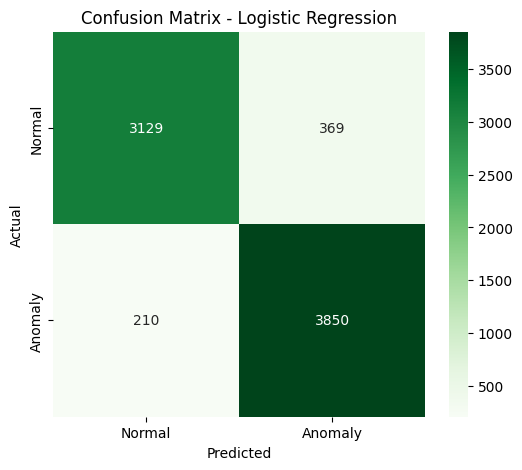

Accuracy:  0.9234
Precision: 0.9125
Recall:    0.9483
F1 Score:  0.9301


In [143]:

# Model Initialization
lg_model = LogisticRegression(random_state=42, max_iter=1000)
lg_model.fit(x_train, y_train)

# Predictions
y_pred = lg_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Model Scores
lg_train = lg_model.score(x_train, y_train)
lg_test = lg_model.score(x_test, y_test)

print(f"Train Score: {lg_train:.4f}")
print(f"Test Score: {lg_test:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [107]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

[I 2025-08-03 13:41:31,503] A new study created in memory with name: no-name-bd53a7aa-abec-4893-92c9-ad7d26f0ffa4
[I 2025-08-03 13:41:31,543] Trial 0 finished with value: 0.9947075946017465 and parameters: {'dt_max_depth': 31, 'dt_max_features': 7}. Best is trial 0 with value: 0.9947075946017465.
[I 2025-08-03 13:41:31,596] Trial 1 finished with value: 0.9916644614977508 and parameters: {'dt_max_depth': 8, 'dt_max_features': 6}. Best is trial 0 with value: 0.9947075946017465.
[I 2025-08-03 13:41:31,644] Trial 2 finished with value: 0.9958983858163535 and parameters: {'dt_max_depth': 23, 'dt_max_features': 9}. Best is trial 2 with value: 0.9958983858163535.
[I 2025-08-03 13:41:31,675] Trial 3 finished with value: 0.9932521831172267 and parameters: {'dt_max_depth': 30, 'dt_max_features': 6}. Best is trial 2 with value: 0.9958983858163535.
[I 2025-08-03 13:41:31,692] Trial 4 finished with value: 0.990209050013231 and parameters: {'dt_max_depth': 20, 'dt_max_features': 2}. Best is trial 2 

FrozenTrial(number=18, state=1, values=[0.9962953162212226], datetime_start=datetime.datetime(2025, 8, 3, 13, 41, 32, 268420), datetime_complete=datetime.datetime(2025, 8, 3, 13, 41, 32, 339882), params={'dt_max_depth': 18, 'dt_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=18, value=None)


Train Score: 1.0000
Test Score: 0.9943

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3498
           1       1.00      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



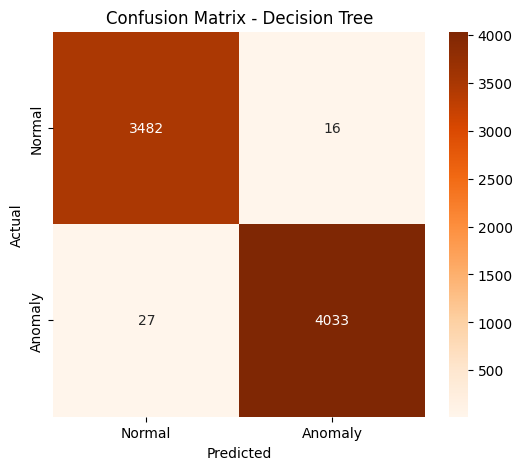

Accuracy:  0.9943
Precision: 0.9960
Recall:    0.9933
F1 Score:  0.9947


In [144]:
# Initialize and Train
dt = DecisionTreeClassifier(
    max_features=study_dt.best_trial.params['dt_max_features'],
    max_depth=study_dt.best_trial.params['dt_max_depth']
)
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Model Scores
dt_train = dt.score(x_train, y_train)
dt_test = dt.score(x_test, y_test)

print(f"Train Score: {dt_train:.4f}")
print(f"Test Score: {dt_test:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


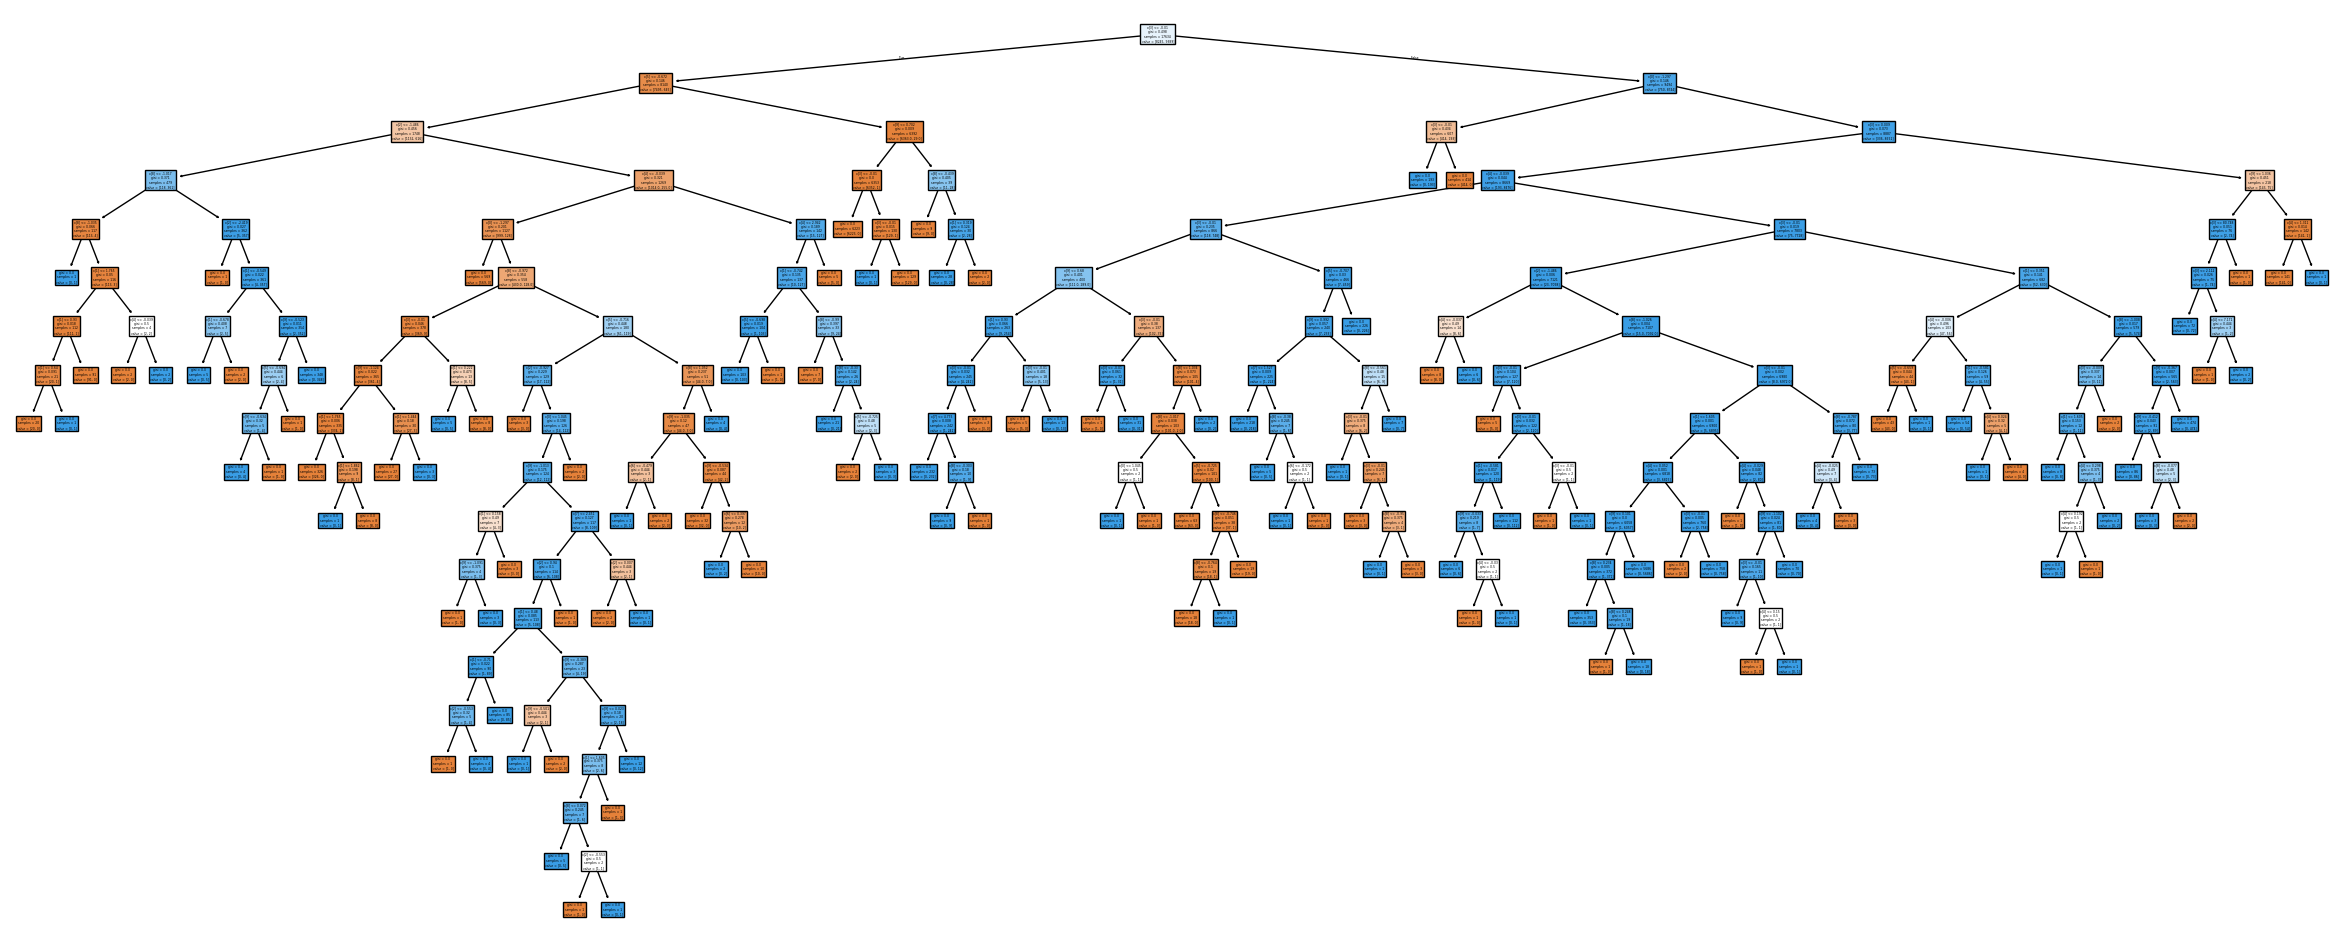

In [145]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

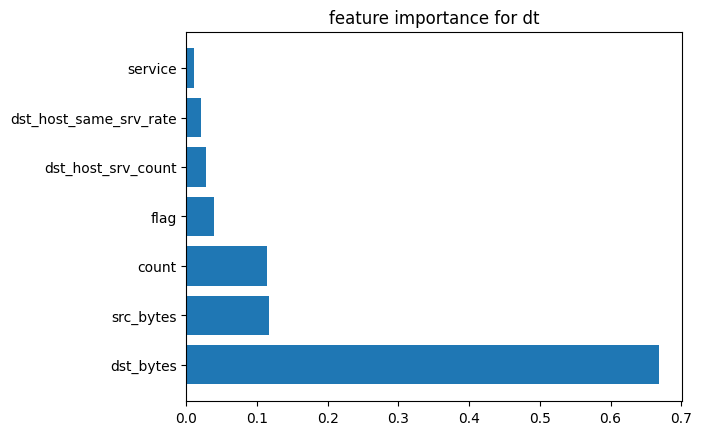

In [110]:

from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

In [111]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [112]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

[I 2025-08-03 13:41:40,460] A new study created in memory with name: no-name-46de72ba-d48d-4e2e-bfe9-975972456c21
[I 2025-08-03 13:41:40,642] Trial 0 finished with value: 0.9956337655464409 and parameters: {'rf_max_depth': 13, 'rf_max_features': 3, 'rf_n_estimators': 9}. Best is trial 0 with value: 0.9956337655464409.
[I 2025-08-03 13:41:40,824] Trial 1 finished with value: 0.9958983858163535 and parameters: {'rf_max_depth': 24, 'rf_max_features': 6, 'rf_n_estimators': 8}. Best is trial 1 with value: 0.9958983858163535.
[I 2025-08-03 13:41:40,920] Trial 2 finished with value: 0.9947075946017465 and parameters: {'rf_max_depth': 11, 'rf_max_features': 2, 'rf_n_estimators': 6}. Best is trial 1 with value: 0.9958983858163535.
[I 2025-08-03 13:41:41,048] Trial 3 finished with value: 0.9958983858163535 and parameters: {'rf_max_depth': 11, 'rf_max_features': 3, 'rf_n_estimators': 10}. Best is trial 1 with value: 0.9958983858163535.
[I 2025-08-03 13:41:41,207] Trial 4 finished with value: 0.99

FrozenTrial(number=5, state=1, values=[0.9966922466260916], datetime_start=datetime.datetime(2025, 8, 3, 13, 41, 41, 208414), datetime_complete=datetime.datetime(2025, 8, 3, 13, 41, 41, 652857), params={'rf_max_depth': 25, 'rf_max_features': 7, 'rf_n_estimators': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=5, value=None)


In [113]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9996597482136781
Test Score: 0.9958983858163535


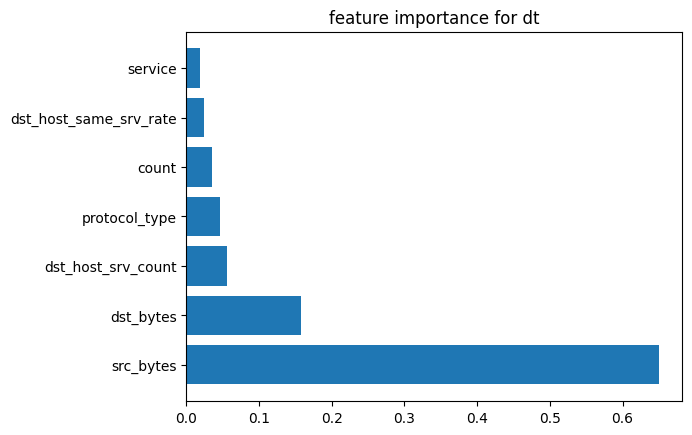

In [114]:

from matplotlib import pyplot as plt
def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

In [115]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Training Score: 0.9948
Test Score: 0.9927

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



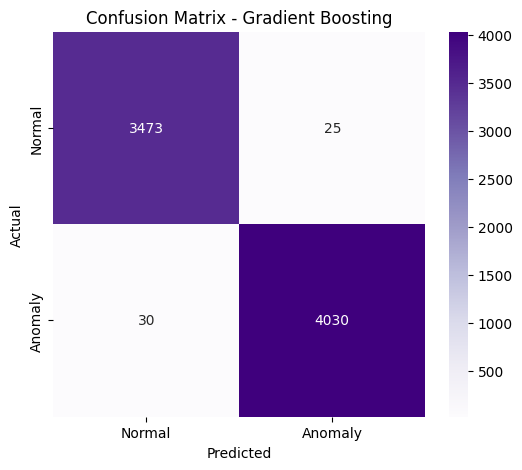

Accuracy:  0.9927
Precision: 0.9938
Recall:    0.9926
F1 Score:  0.9932


In [147]:


# Accuracy Scores
SKGB_train, SKGB_test = SKGB.score(x_train, y_train), SKGB.score(x_test, y_test)

print(f"Training Score: {SKGB_train:.4f}")
print(f"Test Score: {SKGB_test:.4f}")

# Predictions
y_pred = SKGB.predict(x_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [117]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Training Score: 1.0000
Test Score: 0.9960

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



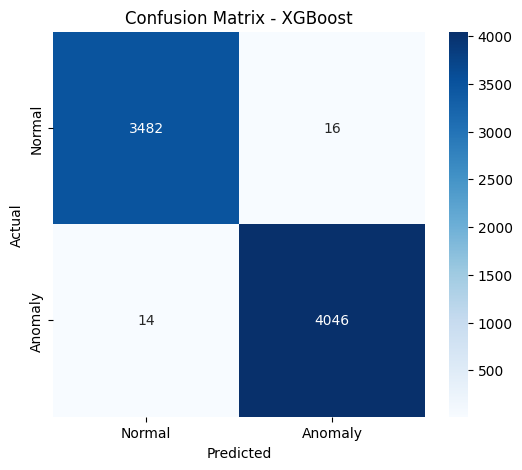

Accuracy:  0.9960
Precision: 0.9961
Recall:    0.9966
F1 Score:  0.9963


In [148]:
# Accuracy Scores
xgb_train, xgb_test = xgb_model.score(x_train, y_train), xgb_model.score(x_test, y_test)

print(f"Training Score: {xgb_train:.4f}")
print(f"Test Score: {xgb_test:.4f}")

# Predictions
y_pred = xgb_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [119]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Score: 1.0000
Test Score: 0.9966

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



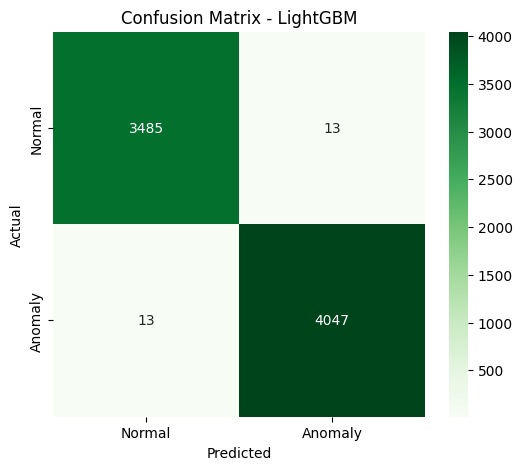

Accuracy:  0.9966
Precision: 0.9968
Recall:    0.9968
F1 Score:  0.9968


In [149]:
# Accuracy Scores
lgb_train, lgb_test = lgb_model.score(x_train, y_train), lgb_model.score(x_test, y_test)

print(f"Training Score: {lgb_train:.4f}")
print(f"Test Score: {lgb_test:.4f}")

# Predictions
y_pred = lgb_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [121]:
ab_model = AdaBoostClassifier(random_state=42)

In [122]:
ab_model.fit(x_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


Training Score: 0.9735
Test Score: 0.9726

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3498
           1       0.97      0.98      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



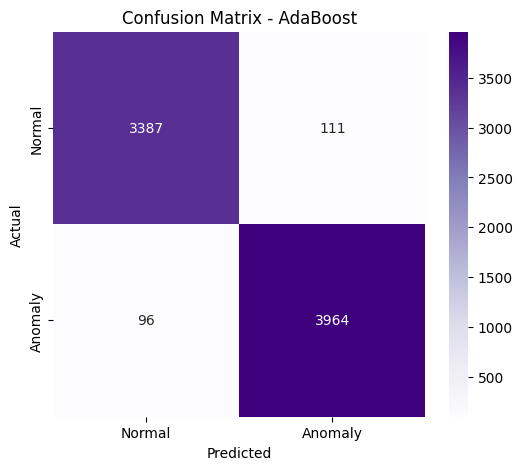

Accuracy:  0.9726
Precision: 0.9728
Recall:    0.9764
F1 Score:  0.9746


In [150]:
# Accuracy Scores
ab_train, ab_test = ab_model.score(x_train, y_train), ab_model.score(x_test, y_test)

print(f"Training Score: {ab_train:.4f}")
print(f"Test Score: {ab_test:.4f}")

# Predictions
y_pred = ab_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [124]:
cb_model = CatBoostClassifier(verbose=0)

In [125]:
cb_model.fit(x_train, y_train)

Training Score: 0.9986
Test Score: 0.9956

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



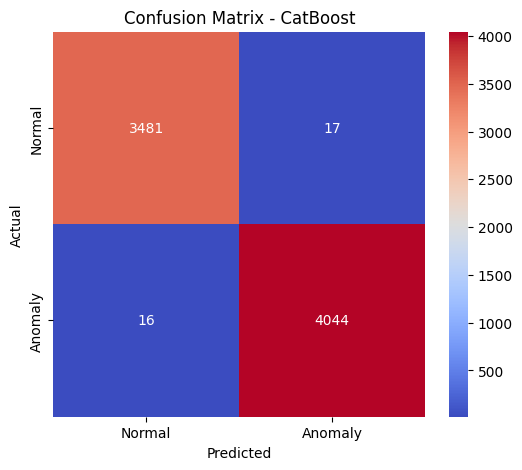

Accuracy:  0.9956
Precision: 0.9958
Recall:    0.9961
F1 Score:  0.9959


In [151]:
# Accuracy Scores
cb_train, cb_test = cb_model.score(x_train, y_train), cb_model.score(x_test, y_test)

print(f"Training Score: {cb_train:.4f}")
print(f"Test Score: {cb_test:.4f}")

# Predictions
y_pred = cb_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [127]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


Training Score: 0.8976
Test Score: 0.8971

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3498
           1       0.87      0.95      0.91      4060

    accuracy                           0.90      7558
   macro avg       0.90      0.89      0.90      7558
weighted avg       0.90      0.90      0.90      7558



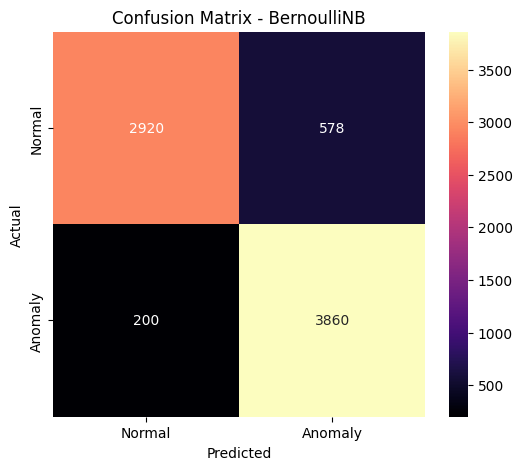

Accuracy:  0.8971
Precision: 0.8698
Recall:    0.9507
F1 Score:  0.9084


In [153]:
# Accuracy Scores
BNB_train, BNB_test = BNB_model.score(x_train, y_train), BNB_model.score(x_test, y_test)

print(f"Training Score: {BNB_train:.4f}")
print(f"Test Score: {BNB_test:.4f}")

# Predictions
y_pred = BNB_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - BernoulliNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [129]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [130]:
v_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


,estimators,"[('KNeighborsClassifier', ...), ('XGBClassifier', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Score: 1.0000
Test Score: 0.9966


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



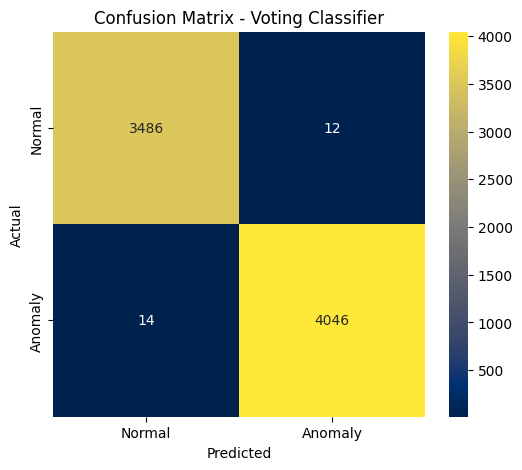

Accuracy:  0.9966
Precision: 0.9970
Recall:    0.9966
F1 Score:  0.9968


In [154]:
# Accuracy Scores
voting_train, voting_test = v_clf.score(x_train, y_train), v_clf.score(x_test, y_test)

print(f"Training Score: {voting_train:.4f}")
print(f"Test Score: {voting_test:.4f}")

# Predictions
y_pred = v_clf.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='cividis', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [132]:

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [133]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

[I 2025-08-03 13:42:20,598] A new study created in memory with name: no-name-3c8d752f-8807-48c4-bd67-b0b069a82651
[I 2025-08-03 13:42:24,756] Trial 0 finished with value: 0.9670547763958719 and parameters: {'kernel': 'rbf', 'c': 0.19999999999999998}. Best is trial 0 with value: 0.9670547763958719.
[I 2025-08-03 13:42:30,080] Trial 1 finished with value: 0.9319925906324424 and parameters: {'kernel': 'linear', 'c': 0.42000000000000004}. Best is trial 0 with value: 0.9670547763958719.
[I 2025-08-03 13:42:36,798] Trial 2 finished with value: 0.9382111669753903 and parameters: {'kernel': 'poly', 'c': 0.13999999999999999, 'degree': 2}. Best is trial 0 with value: 0.9670547763958719.
[I 2025-08-03 13:42:42,465] Trial 3 finished with value: 0.9462820852077269 and parameters: {'kernel': 'poly', 'c': 0.16, 'degree': 4}. Best is trial 0 with value: 0.9670547763958719.
[I 2025-08-03 13:42:45,134] Trial 4 finished with value: 0.9666578459910029 and parameters: {'kernel': 'poly', 'c': 0.32, 'degree'

FrozenTrial(number=11, state=1, values=[0.9708917703096057], datetime_start=datetime.datetime(2025, 8, 3, 13, 43, 8, 766089), datetime_complete=datetime.datetime(2025, 8, 3, 13, 43, 11, 891952), params={'kernel': 'rbf', 'c': 0.9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=11, value=None)


In [134]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

,C,0.9
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Training Score: 0.9682
Test Score: 0.9709

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3498
           1       0.96      0.99      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



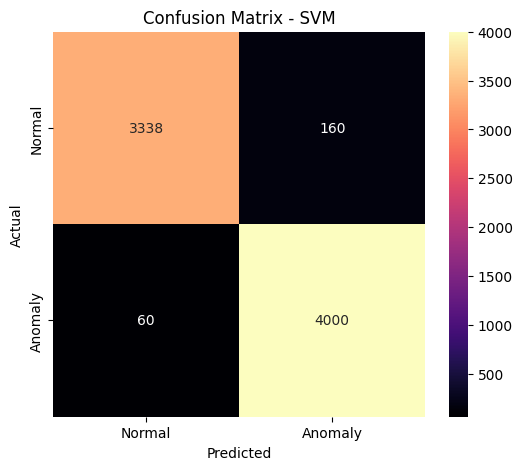

Accuracy:  0.9709
Precision: 0.9615
Recall:    0.9852
F1 Score:  0.9732


In [156]:
# Accuracy Scores
SVM_train, SVM_test = SVM_model.score(x_train, y_train), SVM_model.score(x_test, y_test)

print(f"Training Score: {SVM_train:.4f}")
print(f"Test Score: {SVM_test:.4f}")

# Predictions
y_pred = SVM_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 1.0000
Test Score:     0.9963

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



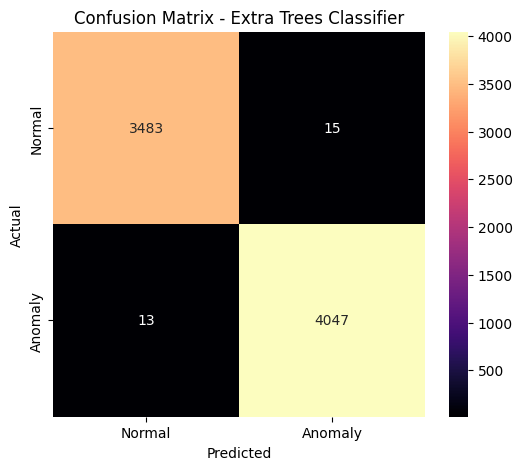

Accuracy:  0.9963
Precision: 0.9963
Recall:    0.9968
F1 Score:  0.9966


In [198]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and Train Extra Trees Classifier
ETC_model = ExtraTreesClassifier(random_state=42)
ETC_model.fit(x_train, y_train)

# Accuracy Scores
ETC_train, ETC_test = ETC_model.score(x_train, y_train), ETC_model.score(x_test, y_test)
print(f"Training Score: {ETC_train:.4f}")
print(f"Test Score:     {ETC_test:.4f}")

# Predictions
y_pred = ETC_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Extra Trees Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.9122
Test Score:     0.9112

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3498
           1       0.87      0.98      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.92      0.91      0.91      7558
weighted avg       0.92      0.91      0.91      7558



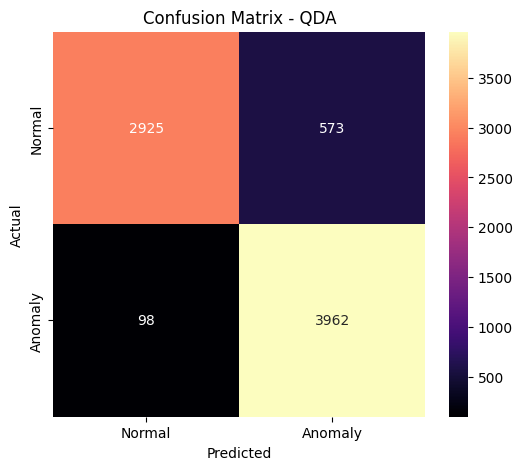

Accuracy:  0.9112
Precision: 0.8736
Recall:    0.9759
F1 Score:  0.9219


In [200]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and Train QDA
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_train, y_train)

# Accuracy Scores
QDA_train, QDA_test = QDA_model.score(x_train, y_train), QDA_model.score(x_test, y_test)
print(f"Training Score: {QDA_train:.4f}")
print(f"Test Score:     {QDA_test:.4f}")

# Predictions
y_pred = QDA_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.9254
Test Score:     0.9209

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3498
           1       0.90      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558



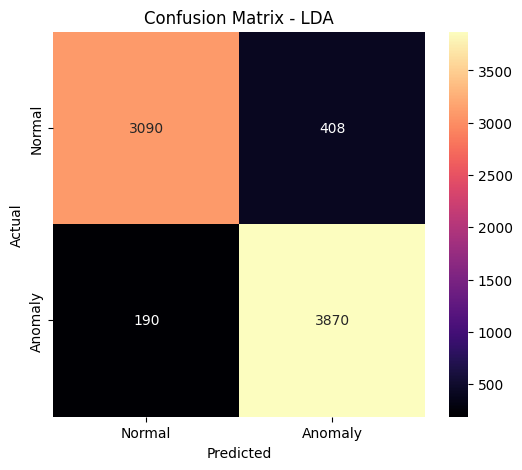

Accuracy:  0.9209
Precision: 0.9046
Recall:    0.9532
F1 Score:  0.9283


In [201]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and Train LDA
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)

# Accuracy Scores
LDA_train, LDA_test = LDA_model.score(x_train, y_train), LDA_model.score(x_test, y_test)
print(f"Training Score: {LDA_train:.4f}")
print(f"Test Score:     {LDA_test:.4f}")

# Predictions
y_pred = LDA_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.9254
Test Score:     0.9207

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3498
           1       0.90      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558



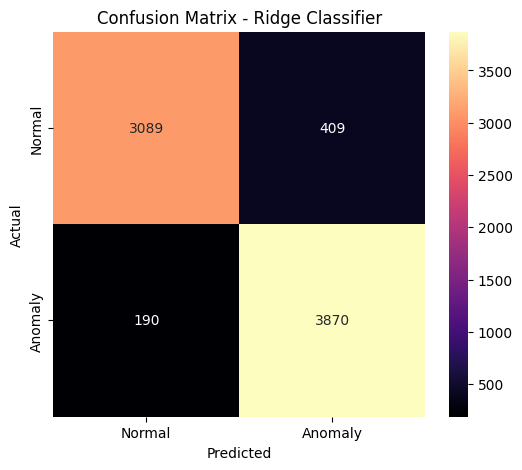

Accuracy:  0.9207
Precision: 0.9044
Recall:    0.9532
F1 Score:  0.9282


In [202]:
from sklearn.linear_model import RidgeClassifier

# Initialize and Train Ridge Classifier
Ridge_model = RidgeClassifier()
Ridge_model.fit(x_train, y_train)

# Accuracy Scores
Ridge_train, Ridge_test = Ridge_model.score(x_train, y_train), Ridge_model.score(x_test, y_test)
print(f"Training Score: {Ridge_train:.4f}")
print(f"Test Score:     {Ridge_test:.4f}")

# Predictions
y_pred = Ridge_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Ridge Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.8758
Test Score:     0.8746

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3498
           1       0.83      0.97      0.89      4060

    accuracy                           0.87      7558
   macro avg       0.89      0.87      0.87      7558
weighted avg       0.89      0.87      0.87      7558



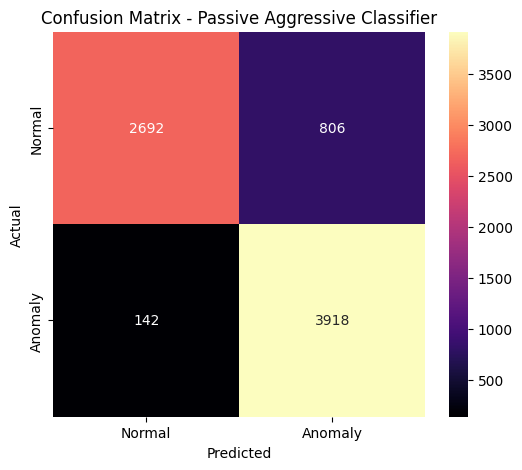

Accuracy:  0.8746
Precision: 0.8294
Recall:    0.9650
F1 Score:  0.8921


In [203]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and Train
PA_model = PassiveAggressiveClassifier(random_state=42)
PA_model.fit(x_train, y_train)

# Accuracy Scores
PA_train, PA_test = PA_model.score(x_train, y_train), PA_model.score(x_test, y_test)
print(f"Training Score: {PA_train:.4f}")
print(f"Test Score:     {PA_test:.4f}")

# Predictions
y_pred = PA_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Passive Aggressive Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.9318
Test Score:     0.9274

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3498
           1       0.91      0.96      0.93      4060

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



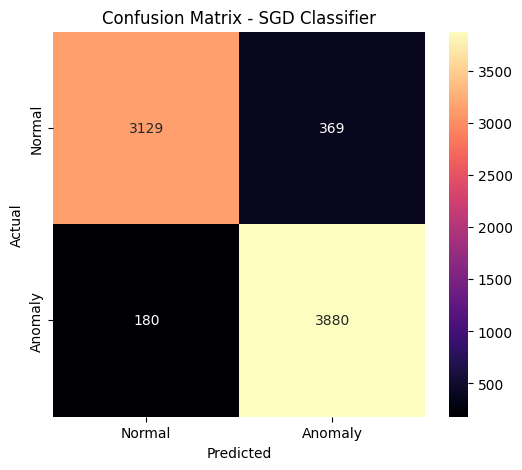

Accuracy:  0.9274
Precision: 0.9132
Recall:    0.9557
F1 Score:  0.9339


In [204]:
from sklearn.linear_model import SGDClassifier

# Initialize and Train
SGD_model = SGDClassifier(random_state=42)
SGD_model.fit(x_train, y_train)

# Accuracy Scores
SGD_train, SGD_test = SGD_model.score(x_train, y_train), SGD_model.score(x_test, y_test)
print(f"Training Score: {SGD_train:.4f}")
print(f"Test Score:     {SGD_test:.4f}")

# Predictions
y_pred = SGD_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Training Score: 0.9999
Test Score:     0.9954

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



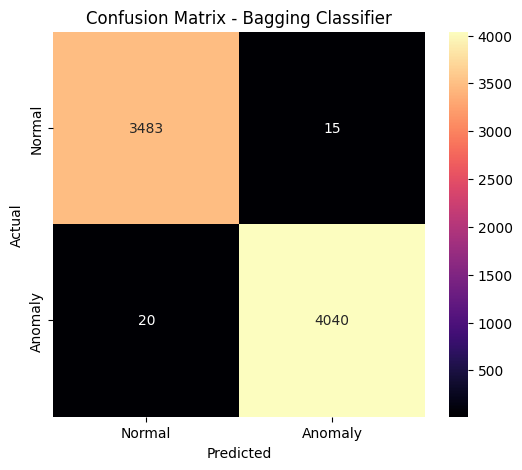

Accuracy:  0.9954
Precision: 0.9963
Recall:    0.9951
F1 Score:  0.9957


In [208]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# For scikit-learn >= 1.2
Bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
Bagging_model.fit(x_train, y_train)

# Accuracy Scores
Bagging_train, Bagging_test = Bagging_model.score(x_train, y_train), Bagging_model.score(x_test, y_test)
print(f"Training Score: {Bagging_train:.4f}")
print(f"Test Score:     {Bagging_test:.4f}")

# Predictions
y_pred = Bagging_model.predict(x_test)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")




Training Score: 0.9859
Test Score:     0.9844

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



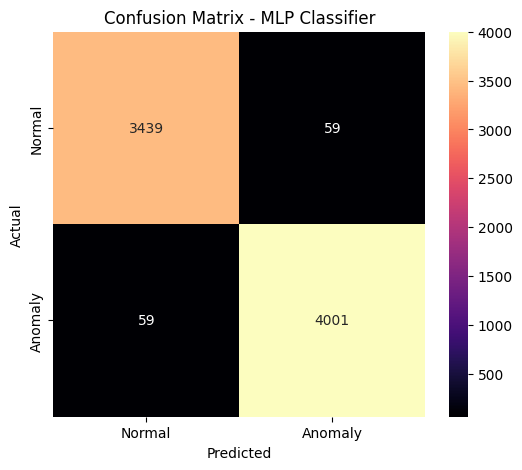

Accuracy:  0.9844
Precision: 0.9855
Recall:    0.9855
F1 Score:  0.9855


In [207]:
from sklearn.neural_network import MLPClassifier

# Initialize and Train
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
MLP_model.fit(x_train, y_train)

# Accuracy Scores
MLP_train, MLP_test = MLP_model.score(x_train, y_train), MLP_model.score(x_test, y_test)
print(f"Training Score: {MLP_train:.4f}")
print(f"Test Score:     {MLP_test:.4f}")

# Predictions
y_pred = MLP_model.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [136]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
        ["Voting", voting_train, voting_test],
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.985256 │     0.982403 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928887 │     0.923392 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.995634 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.99966  │     0.995898 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.994783 │     0.992723 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      1        │     0.996031 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      0.973517 │     0.972612 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     0.99656  │
├─────────

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Example Dataset (Iris)
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for models that require it
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Naive Bayes": GaussianNB(),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gnb', GaussianNB())
    ], voting='hard'),
    "SVM": SVC(),
    "Extra Trees": ExtraTreesClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "SGD Classifier": SGDClassifier(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

# Evaluate models
results = []

for name, model in models.items():
    if name in ["KNN", "Logistic Regression", "SVM", "SGD Classifier", "Ridge Classifier",
                "Passive Aggressive Classifier", "MLP Classifier", "LDA", "QDA"]:
        model.fit(x_train_scaled, y_train)
        train_acc = model.score(x_train_scaled, y_train)
        test_acc = model.score(x_test_scaled, y_test)
    else:
        model.fit(x_train, y_train)
        train_acc = model.score(x_train, y_train)
        test_acc = model.score(x_test, y_test)
    
    results.append([name, round(train_acc, 4), round(test_acc, 4)])

# Display table
print(tabulate(results, headers=["Model", "Train Score", "Test Score"], tablefmt="fancy_grid"))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [209]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Initialize all models
models = {
    # Traditional Models
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': BernoulliNB(),
    
    # Ensemble Methods
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ]),
    'SVM': SVC(probability=True),
    'Extra Trees': ExtraTreesClassifier(),
    
    # Linear Models
    'Ridge Classifier': RidgeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive': PassiveAggressiveClassifier(),
    
    # Other
    'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    'MLP Classifier': MLPClassifier(max_iter=1000)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame and sort by F1 Score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the results table
print(results_df.to_string(index=False))

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [138]:
!pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, LSTM, GRU, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Normalize data for DL models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train.shape[1]


NameError: name 'X_test' is not defined

In [193]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, LSTM, GRU, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Normalize data for DL models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train.shape[1]


NameError: name 'X_test' is not defined

In [195]:
# 1. Simple DNN
def build_dnn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 2. Deeper DNN
def build_deep_dnn():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. DNN with BatchNorm
def build_bn_dnn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. CNN 1D
def build_cnn1d():
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        Conv1D(64, 3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 5. LSTM
def build_lstm():
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    return model

# 6. GRU
def build_gru():
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        GRU(64),
        Dense(1, activation='sigmoid')
    ])
    return model

# 7. CNN + LSTM
def build_cnn_lstm():
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        Conv1D(64, 3, activation='relu'),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    return model

# 8. Transformer-like MLP
def build_mlp_transformer():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


In [196]:
dl_models = {
    'DNN': build_dnn(),
    'Deep DNN': build_deep_dnn(),
    'BN DNN': build_bn_dnn(),
    'CNN1D': build_cnn1d(),
    'LSTM': build_lstm(),
    'GRU': build_gru(),
    'CNN + LSTM': build_cnn_lstm(),
    'MLP Transformer': build_mlp_transformer()
}

for name, model in dl_models.items():
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)
    loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name}: Accuracy = {acc:.4f}")


NameError: name 'input_dim' is not defined

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

nlp_models = {
    'NB': MultinomialNB(),
    'LogReg': LogisticRegression(max_iter=1000),
    'SVM': LinearSVC(),
    'RF': RandomForestClassifier(),
    'MLP': MLPClassifier(),
    'PassiveAggressive': PassiveAggressiveClassifier()
}

for name, clf in nlp_models.items():
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    pipe.fit(text_train, y_train)
    acc = pipe.score(text_test, y_test)
    print(f"{name}: Accuracy = {acc:.4f}")


NameError: name 'PassiveAggressiveClassifier' is not defined